In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import RELACS as rel
import matplotlib
import matplotlib.cm as cm
from matplotlib import colors
sns.set_style("white")
sns.set_context("paper")
%load_ext rpy2.ipython
%matplotlib inline

/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
%%bash

extract_from_gtf.py -f TSS TES -w gene -b_tss 0 -a_tss 3000 -b_tes 3000 -a_tes 0 -prot_cod \
/home/ferrari/ferrari/my_repository/annotations_gencode/mouse/M18/annotation_snakePipes/gencode.vM18.annotation.sorted.gtf

mv TSS.bed ../INTERMEDIATE_FILES/TSS_pl3kb_corplot.bed
mv TES.bed ../INTERMEDIATE_FILES/TES_min3kb_corplot.bed

Namespace(AFTER_GENE=0, AFTER_TES=0, AFTER_TSS=3000, BEFORE_GENE=0, BEFORE_TES=3000, BEFORE_TSS=0, FEATURE=['TSS', 'TES'], PROTEIN_CODING=True, from_what='gene', gtf_file='/home/ferrari/ferrari/my_repository/annotations_gencode/mouse/M18/annotation_snakePipes/gencode.vM18.annotation.sorted.gtf', out_dir='./', verbose=False)


In [5]:
%%bash 

multiBamSummary BED-file \
-b /home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/mESC_DMSO_rep1_H3K36me3_merged.filtered.bam \
/home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/mESC_DMSO_rep2_H3K36me3_merged.filtered.bam \
/home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/iNPC_DMSO_rep1_H3K36me3_merged.filtered.bam \
/home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/iNPC_DMSO_rep2_H3K36me3_merged.filtered.bam \
-o ../INTERMEDIATE_FILES/H3K36me3_TES_min3kb_counts.mat.gz \
--BED ../INTERMEDIATE_FILES/TES_min3kb_corplot.bed \
-bl /home/ferrari/ferrari/my_repository/blacklist_ChIP-Seq/GRCm38_General_readAttractingRegions.UseThisOne_DKFZ.bed \
-p 20 --outRawCounts ../INTERMEDIATE_FILES/H3K36me3_TES_min3kb_counts.counts -e --minMappingQuality 3

Number of bins found: 21965


In [6]:
%%bash 

multiBamSummary BED-file \
-b /home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/mESC_DMSO_rep1_H3K79me2_merged.filtered.bam \
/home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/mESC_DMSO_rep2_H3K79me2_merged.filtered.bam \
/home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/iNPC_DMSO_rep1_H3K79me2_merged.filtered.bam \
/home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/iNPC_DMSO_rep2_H3K79me2_merged.filtered.bam \
-o ../INTERMEDIATE_FILES/H3K79me2_TSS_pl3kb_counts.mat.gz \
--BED ../INTERMEDIATE_FILES/TSS_pl3kb_corplot.bed \
-bl /home/ferrari/ferrari/my_repository/blacklist_ChIP-Seq/GRCm38_General_readAttractingRegions.UseThisOne_DKFZ.bed \
-p 20 --outRawCounts ../INTERMEDIATE_FILES/H3K79me2_TSS_pl3kb_counts.counts -e --minMappingQuality 3

Number of bins found: 21965


In [43]:
k79 = pd.read_csv("../INTERMEDIATE_FILES/H3K79me2_TSS_pl3kb_counts.counts", sep="\t")
k79 = rel.preprocess_deeptools(k79, merge_rep=True, list_of_columns=[[0,1],[2,3]])
k79.columns = ["H3K79me2_mESC","H3K79me2_NPC48h"]
# k79 = np.log10(k79)
# k79 = k79.replace([np.inf,-np.inf],np.nan)
# k79 = k79.dropna()
k79 = rel.RLE(k79)[1]
k79

,H3K79me2_mESC,H3K79me2_NPC48h
7_19601486_19604486,428.994331,394.147400
7_19626438_19629438,209.028399,181.850888
7_19662033_19665033,573.612816,711.769313
7_19674941_19677941,130.035109,69.119795
7_19678423_19681423,143.403204,65.005521
...,...,...
8_70436579_70439579,252.778529,450.101519
8_70473968_70476968,202.951992,257.553520
8_70484358_70487358,125.173983,102.856837
8_70493158_70496158,145.833767,63.359812


In [42]:
k36 = pd.read_csv("../INTERMEDIATE_FILES/H3K36me3_TES_min3kb_counts.counts", sep="\t")
k36 = rel.preprocess_deeptools(k36, merge_rep=True, list_of_columns=[[0,1],[2,3]])
k36.columns = ["H3K36me3_mESC","H3K36me3_NPC48h"]
# k36 = np.log10(k36)
# k36 = k36.replace([np.inf,-np.inf],np.nan)
# k36 = k36.dropna()
k36 = rel.RLE(k36)[1]
k36

,H3K36me3_mESC,H3K36me3_NPC48h
13_77028810_77031810,69.995144,113.993622
13_77043088_77046088,124.050800,236.644988
X_71836757_71839757,39.502210,70.704905
12_59188583_59191583,327.106020,372.282969
4_46500632_46503632,339.580402,340.537909
...,...,...
10_129944396_129947396,38.116168,40.402803
10_129963011_129966011,42.274295,43.288717
9_58218076_58221076,584.909916,132.752066
9_58259520_58262520,719.356035,366.511140


In [30]:
tr_tss = pd.read_csv("../INTERMEDIATE_FILES/TSS_pl3kb_corplot.bed", sep="\t",header=None, names=['chr','start','end','geneID','sc','strand','symbol'])
tr_tss["coord_ID"] = ['{}_{}_{}'.format(tr_tss["chr"][i],tr_tss["start"][i],tr_tss["end"][i]) for i in tr_tss.index]
tr_tss.index = tr_tss.coord_ID
tr_tss = tr_tss.geneID.to_dict()
tr_tss

tr_tes = pd.read_csv("../INTERMEDIATE_FILES/TES_min3kb_corplot.bed", sep="\t",header=None, names=['chr','start','end','geneID','sc','strand','symbol'])
tr_tes["coord_ID"] = ['{}_{}_{}'.format(tr_tes["chr"][i],tr_tes["start"][i],tr_tes["end"][i]) for i in tr_tes.index]
tr_tes.index = tr_tes.coord_ID
tr_tes = tr_tes.geneID.to_dict()
tr_tes


{'1_3205901_3208901': 'ENSMUSG00000051951.5',
 '1_3999557_4002557': 'ENSMUSG00000025900.12',
 '1_4490931_4493931': 'ENSMUSG00000025902.13',
 '1_4773206_4776206': 'ENSMUSG00000033845.13',
 '1_4845410_4848410': 'ENSMUSG00000025903.14',
 '1_4883770_4886770': 'ENSMUSG00000104217.1',
 '1_4894909_4897909': 'ENSMUSG00000033813.15',
 '1_4909576_4912576': 'ENSMUSG00000002459.17',
 '1_5159529_5162529': 'ENSMUSG00000033793.12',
 '1_5603131_5606131': 'ENSMUSG00000025905.13',
 '1_5913707_5916707': 'ENSMUSG00000033774.4',
 '1_6273648_6276648': 'ENSMUSG00000025907.14',
 '1_6391731_6394731': 'ENSMUSG00000087247.3',
 '1_6857940_6860940': 'ENSMUSG00000033740.17',
 '1_7170628_7173628': 'ENSMUSG00000051285.17',
 '1_8361475_8364475': 'ENSMUSG00000025909.16',
 '1_9544455_9547455': 'ENSMUSG00000061024.8',
 '1_9577673_9580673': 'ENSMUSG00000025911.14',
 '1_9624143_9627143': 'ENSMUSG00000067879.3',
 '1_9667415_9670415': 'ENSMUSG00000025912.16',
 '1_9718622_9721622': 'ENSMUSG00000045210.8',
 '1_9897845_9900845'

In [44]:
k79.index = [tr_tss[i] for i in k79.index]
k36.index = [tr_tes[i] for i in k36.index]

In [49]:
df_plot = k79.merge(k36,how='right',left_index=True, right_index=True)
df_plot = np.log(df_plot)
df_plot = df_plot.replace([np.inf,-np.inf],np.nan)
df_plot = df_plot.dropna()
df_plot

/package/anaconda3/bin/ipython:2: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


,H3K79me2_mESC,H3K79me2_NPC48h,H3K36me3_mESC,H3K36me3_NPC48h
ENSMUSG00000000001.4,5.732310,6.196941,5.898607,6.293621
ENSMUSG00000000003.15,2.274417,2.289931,3.296867,3.362427
ENSMUSG00000000028.15,5.157820,5.365706,5.892887,5.286676
ENSMUSG00000000037.16,2.592871,3.415942,3.658657,4.216842
ENSMUSG00000000049.11,4.512464,4.917012,3.909971,4.600801
...,...,...,...,...
ENSMUSG00000116876.1,5.198922,4.739498,3.964039,3.698899
ENSMUSG00000116925.1,5.114957,4.410195,6.878960,6.360656
ENSMUSG00000116930.1,5.015257,5.959882,4.500840,4.195336
ENSMUSG00000116933.1,4.577002,4.199474,6.296438,6.464769


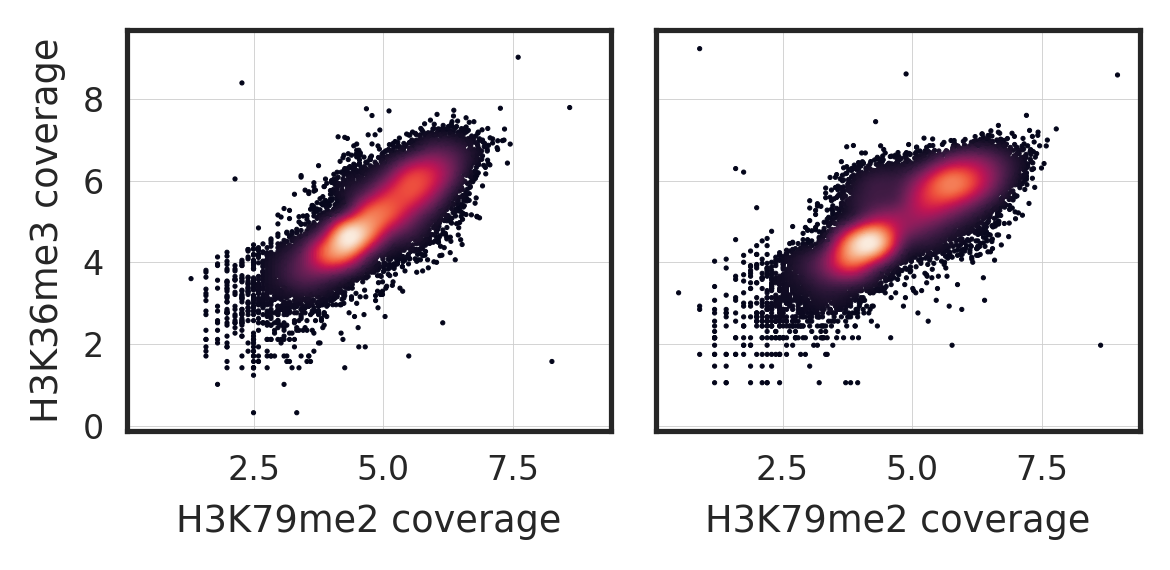

In [57]:
fig,ax = plt.subplots(1,2,dpi=300, figsize=(4,2), sharex=True, sharey=True)

rel.density_scatter(df_plot.H3K79me2_mESC.values, df_plot.H3K36me3_mESC.values, ax=ax[0])
rel.density_scatter(df_plot.H3K79me2_NPC48h.values, df_plot.H3K36me3_NPC48h.values, ax=ax[1])
ax[0].grid('on', linewidth=0.2)
ax[1].grid('on', linewidth=0.2)

ax[0].set_ylabel("H3K36me3 coverage")
ax[0].set_xlabel("H3K79me2 coverage")
ax[1].set_xlabel("H3K79me2 coverage")

plt.tight_layout()

plt.savefig("../FIGURES/H3K36me3-H3K79me2_NPC-ESC.png")